#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A">Practica 1: Datos de muertes en yemen con respecto a COD  Alumno: Ibarra Ramírez Sergio </font>


In [4]:
import pandas as pd

data_url ='https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/Yemen%20Cholera%20Outbreak%20Epidemiology%20Data%20-%20Data_Governorate_Level.csv'

In [5]:
data = pd.read_csv(data_url)
data.head()

,Date,Governorate,Cases,Deaths,CFR (%),Attack Rate (per 1000),COD Gov English,COD Gov Arabic,COD Gov Pcode
0,2018-02-18,Amran,103965,176,0.17,89.582,Amran,عمران,29.0
1,2018-02-18,Al Mahwit,62887,151,0.24,86.122,Al Mahwit,المحويت,27.0
2,2018-02-18,Al Dhale'e,47136,81,0.17,64.438,Al Dhale'e,الضالع,30.0
3,2018-02-18,Hajjah,121287,422,0.35,52.060,Hajjah,حجة,17.0
4,2018-02-18,Sana'a,76250,123,0.16,51.859,Sana'a,صنعاء,23.0


Vamosa obtener ahora las fechas unicas 

In [6]:
fechas =data["Date"].unique()
fechas

array(['2018-02-18', '2018-02-11', '2018-02-04', '2018-01-28',
       '2018-01-21', '2018-01-14', '2018-01-07', '2017-12-31',
       '2017-12-17', '2017-11-26', '2017-11-19', '2017-11-08',
       '2017-11-07', '2017-11-06', '2017-11-05', '2017-11-04',
       '2017-11-03', '2017-10-30', '2017-10-29', '2017-10-28',
       '2017-10-25', '2017-10-22', '2017-10-21', '2017-10-17',
       '2017-10-16', '2017-10-14', '2017-10-11', '2017-10-10',
       '2017-10-09', '2017-10-08', '2017-10-05', '2017-10-04',
       '2017-10-03', '2017-10-02', '2017-10-01', '2017-09-30',
       '2017-09-28', '2017-09-27', '2017-09-26', '2017-09-25',
       '2017-09-24', '2017-09-23', '2017-09-22', '2017-09-21',
       '2017-09-20', '2017-09-19', '2017-09-18', '2017-09-17',
       '2017-09-16', '2017-09-15', '2017-09-14', '2017-09-13',
       '2017-09-12', '2017-09-11', '2017-09-10', '2017-09-09',
       '2017-09-08', '2017-09-07', '2017-09-06', '2017-09-05',
       '2017-09-04', '2017-09-03', '2017-09-02', '2017-

In [7]:
len(fechas)

136

In [8]:
inicio = min(fechas)
final = max(fechas)
final

'2018-02-18'

In [9]:
print("De {} a {}, con un total de {} periodos".format(inicio,final,len(fechas)))

De 2017-05-22 a 2018-02-18, con un total de 136 periodos


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2914 non-null   object 
 1   Governorate             2914 non-null   object 
 2   Cases                   2914 non-null   object 
 3   Deaths                  2914 non-null   int64  
 4   CFR (%)                 2914 non-null   float64
 5   Attack Rate (per 1000)  2914 non-null   float64
 6   COD Gov English         2713 non-null   object 
 7   COD Gov Arabic          2713 non-null   object 
 8   COD Gov Pcode           2713 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 205.0+ KB


In [11]:
pd.to_datetime(data["Date"])

0      2018-02-18
1      2018-02-18
2      2018-02-18
3      2018-02-18
4      2018-02-18
          ...    
2909   2017-05-22
2910   2017-05-22
2911   2017-05-22
2912   2017-05-22
2913   2017-05-22
Name: Date, Length: 2914, dtype: datetime64[ns]

In [12]:
data["Date"] = pd.to_datetime(data["Date"])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2914 non-null   datetime64[ns]
 1   Governorate             2914 non-null   object        
 2   Cases                   2914 non-null   object        
 3   Deaths                  2914 non-null   int64         
 4   CFR (%)                 2914 non-null   float64       
 5   Attack Rate (per 1000)  2914 non-null   float64       
 6   COD Gov English         2713 non-null   object        
 7   COD Gov Arabic          2713 non-null   object        
 8   COD Gov Pcode           2713 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 205.0+ KB


Vamos ahora a arreglar el caso de la columna cases que debería ser un número pero es un object 

In [14]:
data["Cases"]

0       103965
1        62887
2        47136
3       121287
4        76250
         ...  
2909       549
2910       489
2911       189
2912       168
2913         2
Name: Cases, Length: 2914, dtype: object

Nos damos cuenta que algunos de los datos tienen una coma y no se pueden leer como número

In [15]:
nuevos_datos = []
for dato in data["Cases"]:
  nuevo_dato = dato.replace(",", "")
  entero = int(nuevo_dato)
  print(nuevo_dato)
  nuevos_datos.append(nuevo_dato)

print(nuevos_datos)



103965
62887
47136
121287
76250
103214
28243
155908
30568
103184
17841
16018
24342
20966
67129
63696
7288
10706
1168
1399
569
22
103814
62606
47135
121287
75856
102774
28243
155245
30265
102493
17641
15965
24342
20954
66609
63592
7286
10706
1168
1399
568
22
103556
62275
47135
121284
75531
102185
28241
154262
29980
101910
17445
15957
24342
20932
66147
63457
7286
10706
1168
1399
568
22
103285
61927
47132
121279
75177
101535
28241
153446
29718
101364
17217
15936
24341
20908
65852
63282
7286
10706
1168
1399
568
22
102917
61564
47132
121254
74781
100842
28241
152592
29269
100596
16853
15869
24341
20887
65339
63050
7285
10705
1168
1399
568
22
102231
61097
47132
118468
74103
99766
28241
150965
28730
99452
15827
16403
24341
20868
64536
62371
7285
10703
1168
1399
568
22
101793
60805
47126
117646
73266
28241
98861
150319
28452
98975
15821
15924
24334
20846
64128
62036
7285
10702
1168
1399
568
22
100981
60212
47115
116247
28241
72300
97741
149041
27990
98105
15792
15456
20819
22669
63625
61631
72

In [16]:
len(nuevos_datos)

2914

Ejemplo de uso de  list comprehension

In [17]:
lista = [int(dato.replace(",",""))for dato in data["Cases"]]
lista

[103965,
 62887,
 47136,
 121287,
 76250,
 103214,
 28243,
 155908,
 30568,
 103184,
 17841,
 16018,
 24342,
 20966,
 67129,
 63696,
 7288,
 10706,
 1168,
 1399,
 569,
 22,
 103814,
 62606,
 47135,
 121287,
 75856,
 102774,
 28243,
 155245,
 30265,
 102493,
 17641,
 15965,
 24342,
 20954,
 66609,
 63592,
 7286,
 10706,
 1168,
 1399,
 568,
 22,
 103556,
 62275,
 47135,
 121284,
 75531,
 102185,
 28241,
 154262,
 29980,
 101910,
 17445,
 15957,
 24342,
 20932,
 66147,
 63457,
 7286,
 10706,
 1168,
 1399,
 568,
 22,
 103285,
 61927,
 47132,
 121279,
 75177,
 101535,
 28241,
 153446,
 29718,
 101364,
 17217,
 15936,
 24341,
 20908,
 65852,
 63282,
 7286,
 10706,
 1168,
 1399,
 568,
 22,
 102917,
 61564,
 47132,
 121254,
 74781,
 100842,
 28241,
 152592,
 29269,
 100596,
 16853,
 15869,
 24341,
 20887,
 65339,
 63050,
 7285,
 10705,
 1168,
 1399,
 568,
 22,
 102231,
 61097,
 47132,
 118468,
 74103,
 99766,
 28241,
 150965,
 28730,
 99452,
 15827,
 16403,
 24341,
 20868,
 64536,
 62371,
 728

In [18]:
len(lista)

2914

In [19]:
data["Cases"] = lista

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2914 non-null   datetime64[ns]
 1   Governorate             2914 non-null   object        
 2   Cases                   2914 non-null   int64         
 3   Deaths                  2914 non-null   int64         
 4   CFR (%)                 2914 non-null   float64       
 5   Attack Rate (per 1000)  2914 non-null   float64       
 6   COD Gov English         2713 non-null   object        
 7   COD Gov Arabic          2713 non-null   object        
 8   COD Gov Pcode           2713 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 205.0+ KB


### Uso de Matplotlib para el análisis de la tabla de datos de colera en Yemen

In [21]:
import matplotlib.pyplot as plt 

Vamos a hacer uso de pd.pivot_table para re arreglar nuestros data de Cholera en este caso de DEATHS por COD Gov English 

#### Para el caso de pivote_ejercicio1_COD_Gov_English

In [22]:
pivote_ejercicio1_COD_Gov_English = pd.pivot_table(data,
                        values="Deaths",
                        index = ["Date"],
                        columns = ["COD Gov English"])

pivote_ejercicio1_COD_Gov_English

COD Gov English,Abyan,Aden,Al Bayda,Al Dhale'e,Al Hudaydah,Al Jawf,Al Maharah,Al Mahwit,Amanat Al Asimah,Amran,Dhamar,Hajjah,Ibb,Lahj,Marib,Raymah,Sa'ada,Sana'a,Shabwah,Taizz
Date,,,,,,,,,,,,,,,,,,,,
2017-05-22,10.0,12.0,6.0,8.0,32.0,3.0,NaN,34.0,33.0,45.0,33.0,42.0,37.0,0.0,0.0,4.0,NaN,39.0,NaN,23.0
2017-05-27,15.0,12.0,8.0,9.0,40.0,3.0,NaN,45.0,36.0,57.0,41.0,62.0,57.0,1.0,1.0,8.0,0.0,46.0,0.0,30.0
2017-05-30,16.0,16.0,11.0,11.0,41.0,4.0,NaN,50.0,36.0,76.0,44.0,70.0,57.0,2.0,1.0,9.0,0.0,50.0,0.0,38.0
2017-06-04,16.0,23.0,13.0,14.0,59.0,5.0,NaN,63.0,37.0,90.0,52.0,102.0,85.0,2.0,1.0,15.0,0.0,56.0,0.0,48.0
2017-06-07,17.0,23.0,14.0,19.0,74.0,5.0,NaN,68.0,39.0,94.0,55.0,130.0,111.0,5.0,1.0,25.0,0.0,59.0,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-21,35.0,62.0,34.0,81.0,281.0,22.0,1.0,149.0,70.0,175.0,161.0,421.0,287.0,22.0,7.0,120.0,5.0,123.0,3.0,187.0
2018-01-28,35.0,62.0,34.0,81.0,281.0,22.0,1.0,151.0,71.0,176.0,161.0,421.0,287.0,22.0,7.0,120.0,5.0,123.0,3.0,187.0
2018-02-04,35.0,62.0,35.0,81.0,281.0,22.0,1.0,151.0,71.0,176.0,161.0,422.0,287.0,22.0,7.0,120.0,5.0,123.0,3.0,188.0


<AxesSubplot:xlabel='Date'>

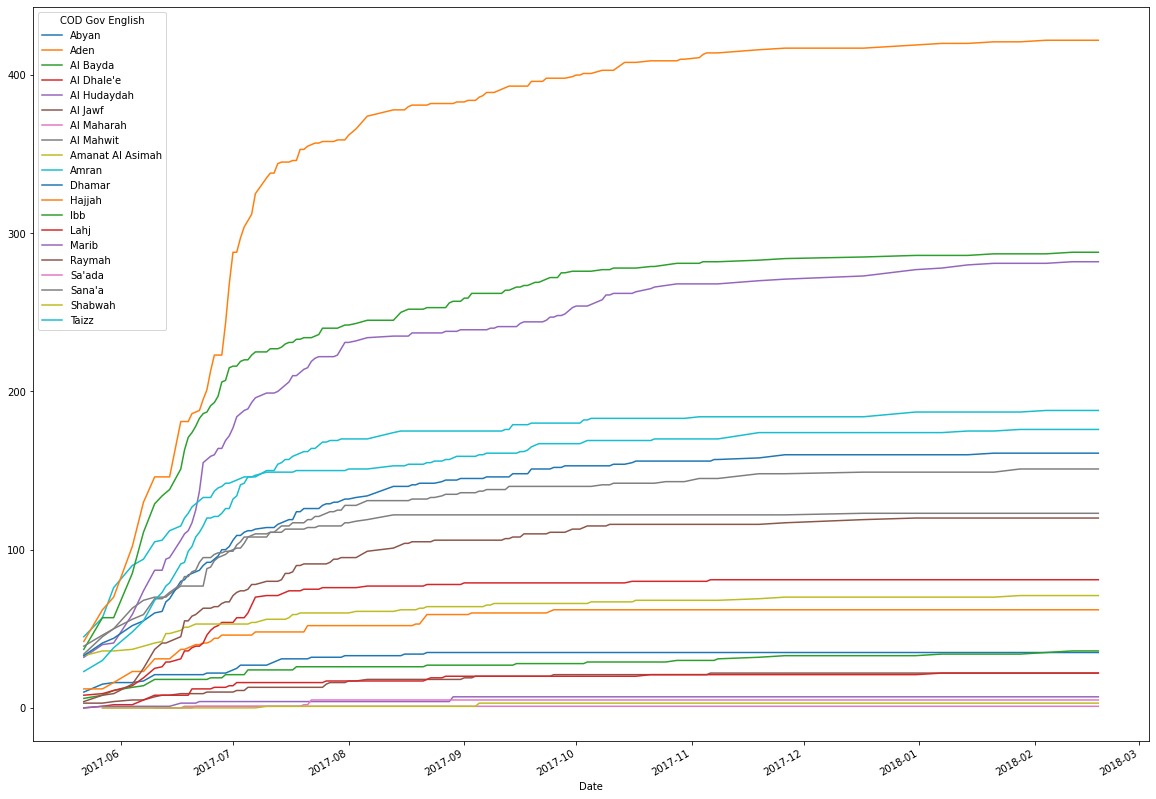

In [23]:
pivote_ejercicio1_COD_Gov_English.plot(figsize=(20,15))

OBSERVAR COMO EN EL GOVERNORATE SE TENIAN DATOS NA Y en EL CASO DE COD Gov English ya no existen esos casos vacios.
Es decir, no existen ese tipo de lineas que "derrepente se cortaban y cambiaban de color"
Esto puede ser, por ejemplo porque en el otro caso se estaba considerando los cases y en este los deaths y "puede ser más fácil cuantificar deaths que cases"

In [24]:
pivote_ejercicio1_COD_Gov_English[["Abyan","Aden"]]

COD Gov English,Abyan,Aden
Date,,
2017-05-22,10.0,12.0
2017-05-27,15.0,12.0
2017-05-30,16.0,16.0
2017-06-04,16.0,23.0
2017-06-07,17.0,23.0
...,...,...
2018-01-21,35.0,62.0
2018-01-28,35.0,62.0
2018-02-04,35.0,62.0


<AxesSubplot:xlabel='Date'>

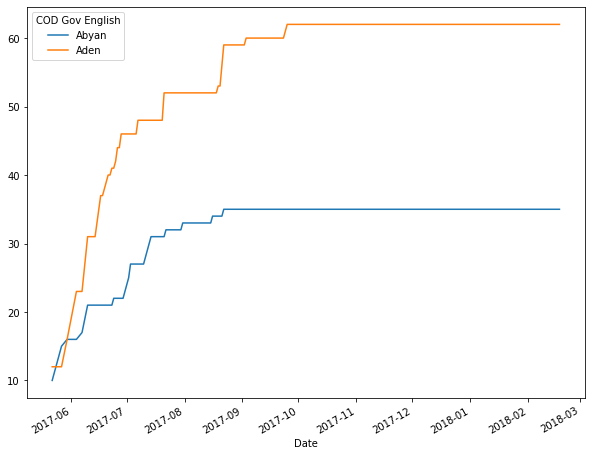

In [25]:
pivote_ejercicio1_COD_Gov_English[["Abyan","Aden"]].plot(figsize=(10,8)) 

#### Para el caso de pivote_ejercicio1_COD_Gov_Arabic

COD Gov Arabic

In [26]:
pivote_ejercicio1_COD_Gov_Arabic = pd.pivot_table(data,
                        values="Deaths",
                        index = ["Date"],
                        columns = ["COD Gov Arabic"])

pivote_ejercicio1_COD_Gov_Arabic

COD Gov Arabic,أبين,أمانة العاصمة,إب,البيضاء,الجوف,الحديدة,الضالع,المحويت,المهرة,تعز,حجة,ذمار,ريمة,شبوة,صعدة,صنعاء,عدن,عمران,لحج,مأرب
Date,,,,,,,,,,,,,,,,,,,,
2017-05-22,10.0,33.0,37.0,6.0,3.0,32.0,8.0,34.0,NaN,23.0,42.0,33.0,4.0,NaN,NaN,39.0,12.0,45.0,0.0,0.0
2017-05-27,15.0,36.0,57.0,8.0,3.0,40.0,9.0,45.0,NaN,30.0,62.0,41.0,8.0,0.0,0.0,46.0,12.0,57.0,1.0,1.0
2017-05-30,16.0,36.0,57.0,11.0,4.0,41.0,11.0,50.0,NaN,38.0,70.0,44.0,9.0,0.0,0.0,50.0,16.0,76.0,2.0,1.0
2017-06-04,16.0,37.0,85.0,13.0,5.0,59.0,14.0,63.0,NaN,48.0,102.0,52.0,15.0,0.0,0.0,56.0,23.0,90.0,2.0,1.0
2017-06-07,17.0,39.0,111.0,14.0,5.0,74.0,19.0,68.0,NaN,55.0,130.0,55.0,25.0,0.0,0.0,59.0,23.0,94.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-21,35.0,70.0,287.0,34.0,22.0,281.0,81.0,149.0,1.0,187.0,421.0,161.0,120.0,3.0,5.0,123.0,62.0,175.0,22.0,7.0
2018-01-28,35.0,71.0,287.0,34.0,22.0,281.0,81.0,151.0,1.0,187.0,421.0,161.0,120.0,3.0,5.0,123.0,62.0,176.0,22.0,7.0
2018-02-04,35.0,71.0,287.0,35.0,22.0,281.0,81.0,151.0,1.0,188.0,422.0,161.0,120.0,3.0,5.0,123.0,62.0,176.0,22.0,7.0


<AxesSubplot:xlabel='Date'>

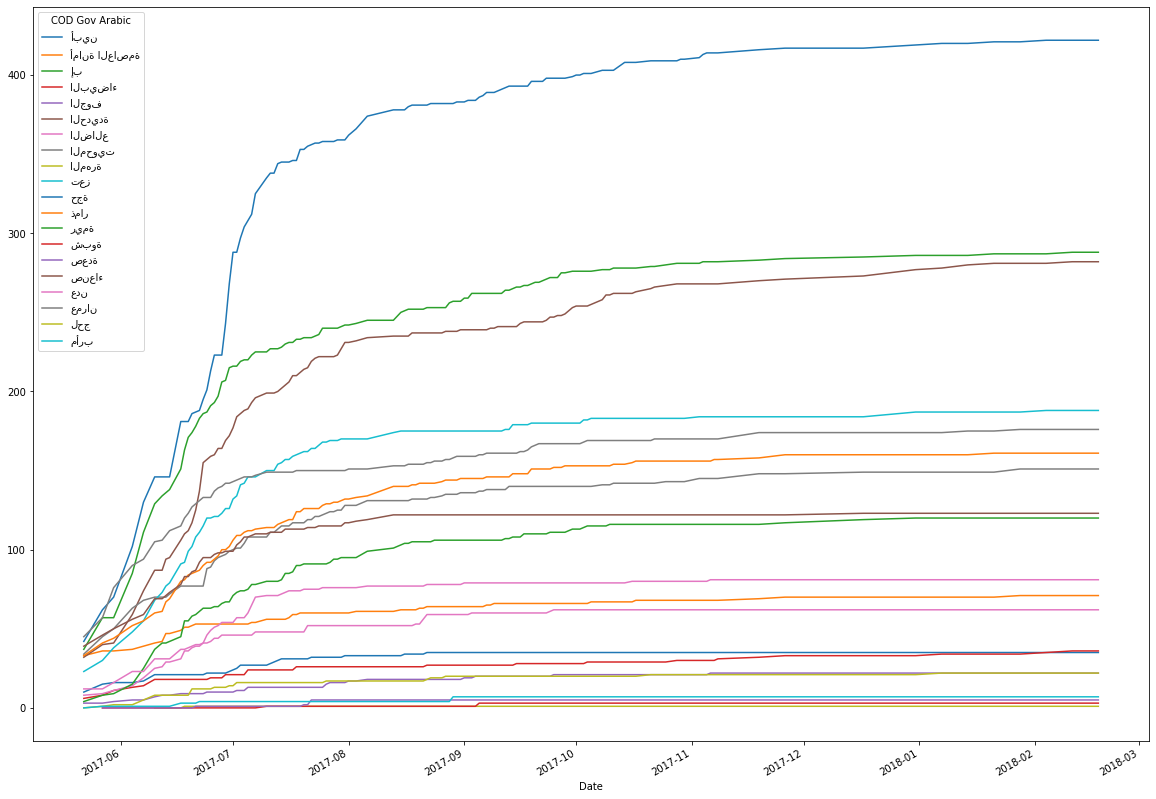

In [27]:
pivote_ejercicio1_COD_Gov_Arabic.plot(figsize=(20,15))

#### Para el caso de pivote_ejercicio1_COD_Gov_Pcode

In [28]:
pivote_ejercicio1_deaths_vs_Governorate = pd.pivot_table(data,
                        values="Deaths",
                        index = ["Date"],
                        columns = ["Governorate"])

pivote_ejercicio1_deaths_vs_Governorate

Governorate,AL Mahrah,Abyan,Aden,Al Bayda,Al Dhale'e,Al Hudaydah,Al Jawf,Al Maharah,Al Mahwit,Al-Hudaydah,...,Lahj,Ma'areb,Marib,Moklla,Raymah,Sa'ada,Sana'a,Say'on,Shabwah,Taizz
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-22,NaN,10.0,12.0,6.0,8.0,NaN,NaN,NaN,34.0,32.0,...,0.0,0.0,NaN,NaN,4.0,NaN,39.0,NaN,NaN,23.0
2017-05-27,NaN,15.0,12.0,8.0,9.0,NaN,NaN,NaN,45.0,40.0,...,1.0,1.0,NaN,NaN,8.0,0.0,46.0,NaN,0.0,30.0
2017-05-30,NaN,16.0,16.0,11.0,11.0,NaN,NaN,NaN,50.0,41.0,...,2.0,1.0,NaN,NaN,9.0,0.0,50.0,NaN,0.0,38.0
2017-06-04,NaN,16.0,23.0,13.0,14.0,NaN,NaN,NaN,63.0,59.0,...,2.0,1.0,NaN,NaN,15.0,0.0,56.0,NaN,0.0,48.0
2017-06-07,NaN,17.0,23.0,14.0,19.0,NaN,NaN,NaN,68.0,74.0,...,5.0,1.0,NaN,NaN,25.0,0.0,59.0,NaN,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-21,NaN,35.0,62.0,34.0,81.0,281.0,22.0,1.0,149.0,NaN,...,22.0,NaN,7.0,2.0,120.0,5.0,123.0,0.0,3.0,187.0
2018-01-28,NaN,35.0,62.0,34.0,81.0,281.0,22.0,1.0,151.0,NaN,...,22.0,NaN,7.0,2.0,120.0,5.0,123.0,0.0,3.0,187.0
2018-02-04,NaN,35.0,62.0,35.0,81.0,281.0,22.0,1.0,151.0,NaN,...,22.0,NaN,7.0,2.0,120.0,5.0,123.0,0.0,3.0,188.0


<AxesSubplot:xlabel='Date'>

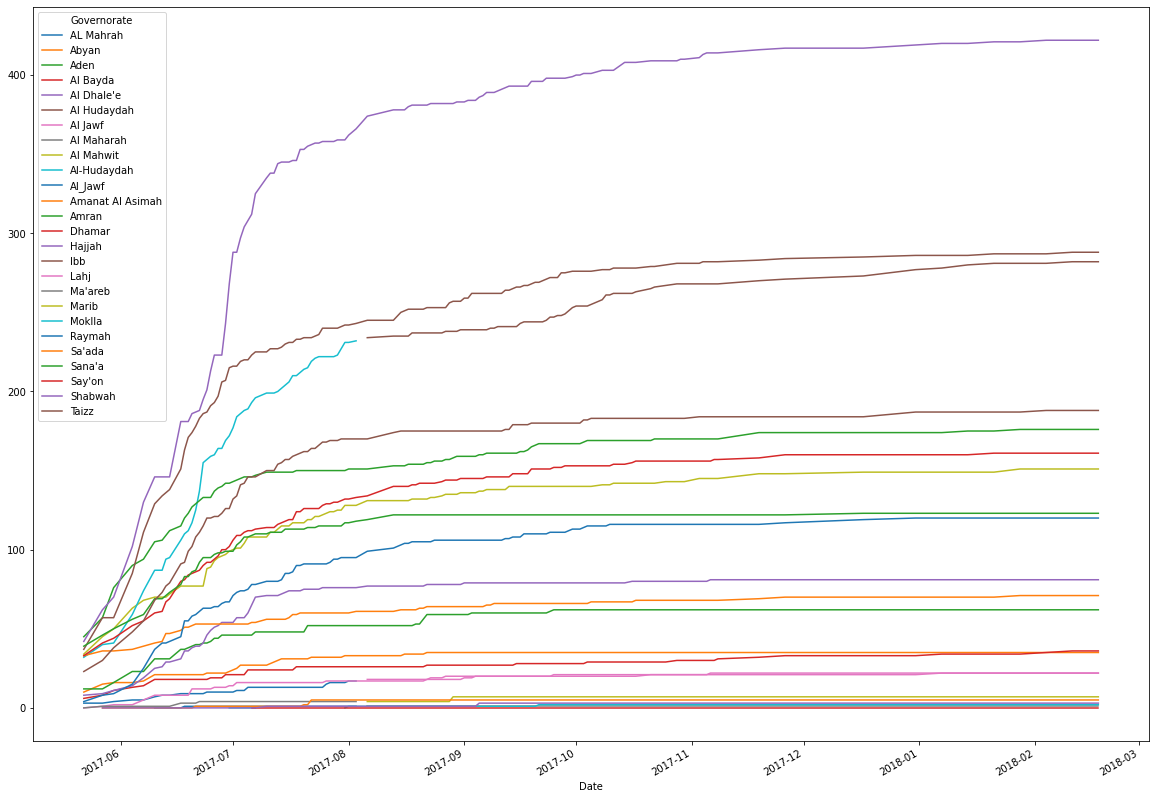

In [30]:
pivote_ejercicio1_deaths_vs_Governorate.plot(figsize=(20,15))

Se observa que setienen tambien faltantes de deaths con respecto al governorate y no con respecto al GOV English. 
Se puede observar la relació´n que existe entonces entre Governorate y una especie de código de identificación o COD 
Es decrir en Governorate teniamos 26 registros y algunos de ellos estaban repetidos y tras ser "nnormalizados" se lograron obtener solo 20 registros.
Y entonces obivamente si se grafican deaths o cases vs Governates se verán esas lineas cortadas debido a casos repetidos y en el caso de GOV, no será así 